### 1. Preparación del entorno

In [1]:
# Librerías internas 
import os              # trabajar con el sistema operativo y variables de entorno
import glob            # manejo de archivos y rutas

# Librerías externas 
import pandas as pd    # dataframes para manipular el CSV
import numpy as np     # manejo de valores nulos (NaN)
import mysql.connector # conector oficial de MySQL para Python
from dotenv import load_dotenv  # cargar variables de entorno desde el archivo .env
import matplotlib.pyplot as plt # transformar datos en gráficos visuales

# Carga de variables de entorno
load_dotenv()  # Busca automáticamente un archivo .env en la carpeta del script

# Variables de conexión a la base de datos
host = os.getenv("MYSQL_HOST")        # Host de la base de datos
user = os.getenv("MYSQL_USER")        # Usuario de la base de datos
password = os.getenv("MYSQL_PASSWORD")# Contraseña de la base de datos


### 2. Conexión al servidor MYSQL

In [2]:
try:
    # Creamos la conexión y la guardamos en la variable 'cnx'
    cnx = mysql.connector.connect(
        host=os.getenv('MYSQL_HOST'),                  # Dirección del servidor MySQL (localhost o IP)
        user=os.getenv('MYSQL_USER'),                  # Usuario que se conectará (ej. root)
        password=os.getenv('MYSQL_PASSWORD'),          # Contraseña del usuario
        use_pure=True,                                 # Usa el conector puro de Python, más compatible
        auth_plugin='mysql_native_password',           # Evita errores de conexión por `caching_sha2_password`
        database='musicstream'
    )

    # Si llegamos aquí, la conexión fue exitosa
    print('Conexión exitosa')  # Mensaje de confirmación

# --- Capturamos cualquier error relacionado con MySQL ---
except mysql.connector.Error as e:
    # Si ocurre un error, lo imprimimos para diagnosticarlo
    print('Error al conectar:', e)

Conexión exitosa


### 3. Consultas y visualización de resultados

In [5]:
# -------------------------------
# 🎯 CONSULTA 1: Top 10 artistas con más oyentes
# -------------------------------

# 1️⃣ Crear cursor con dictionary=True para acceder a columnas por nombre
mycursor = cnx.cursor(dictionary=True)

# 2️⃣ Consulta SQL: obtener los 10 artistas con más oyentes
query1 = """
SELECT Nombre_Artista, Listeners
FROM Artistas
ORDER BY Listeners DESC
LIMIT 10;
"""
mycursor.execute(query1)

# 3️⃣ Traer resultados y convertir a DataFrame
resultados = mycursor.fetchall()
df_top_10_artistas = pd.DataFrame(resultados)

# 4️⃣ Mostrar resultados
print("🎯 Top 10 artistas con más oyentes")
display(df_top_10_artistas)

# 5️⃣ Cerrar cursor para liberar recursos
mycursor.close()


🎯 Top 10 artistas con más oyentes


,Nombre_Artista,Listeners
0,Radiohead,8048259
1,Nirvana,7373477
2,Red Hot Chili Peppers,7104490
3,Queen,7085762
4,Arctic Monkeys,6924955
5,The Killers,6796750
6,Linkin Park,6768133
7,Maroon 5,6474404
8,Green Day,6437276
9,The Beatles,6372317


True

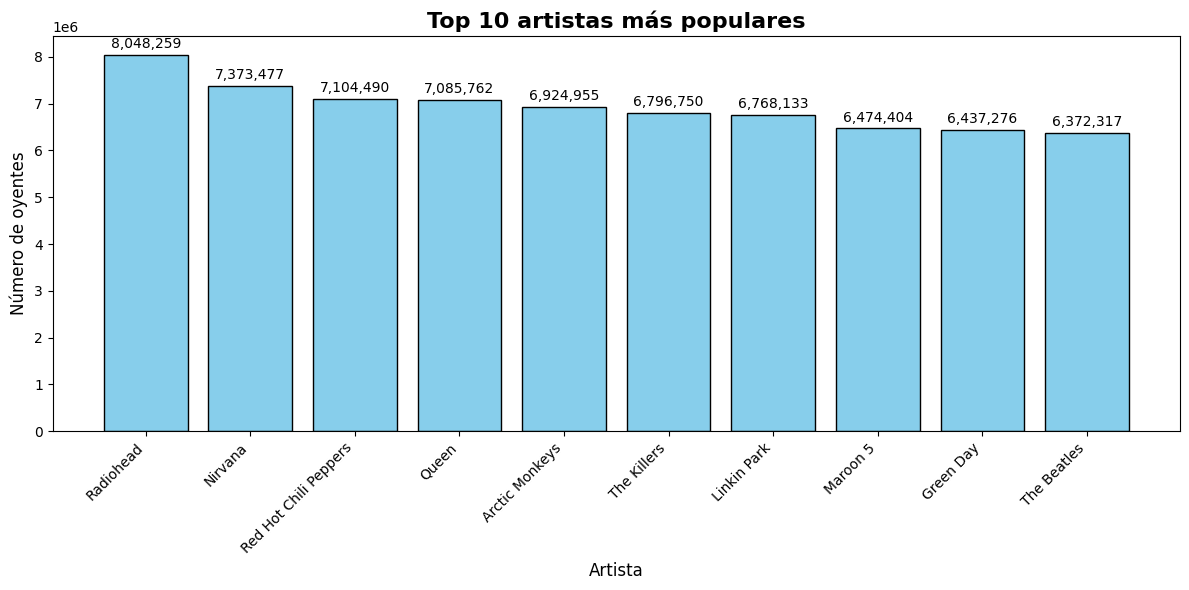

In [6]:
# -------------------------------
# GRÁFICO: Top 10 artistas más populares
# -------------------------------

# 1️⃣ Extraer columnas del DataFrame
# 'Nombre_Artista' será el eje X (los nombres de los artistas)
# 'Listeners' será el eje Y (el número de oyentes)
artistas = df_top_10_artistas['Nombre_Artista']
oyentes = df_top_10_artistas['Listeners']

# 2️⃣ Crear la figura
# figsize=(12,6) define el tamaño del gráfico en pulgadas: ancho x alto
plt.figure(figsize=(12,6))

# 3️⃣ Dibujar el gráfico de barras
# plt.bar(x, y) dibuja barras verticales
# color: color de las barras
# edgecolor: color del borde de las barras para que se vean mejor
bars = plt.bar(artistas, oyentes, color='skyblue', edgecolor='black')

# 4️⃣ Título y etiquetas
# title: título del gráfico
# xlabel: nombre del eje X
# ylabel: nombre del eje Y
plt.title("Top 10 artistas más populares", fontsize=16, fontweight='bold')
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Número de oyentes", fontsize=12)

# 5️⃣ Rotar etiquetas del eje X
# Si los nombres de los artistas son largos, se ven mejor girados 45°
plt.xticks(rotation=45, ha='right')

# 6️⃣ Mostrar valores encima de cada barra (opcional, muy útil para ver datos exactos)
# bar.get_height() obtiene el valor de cada barra
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,        # Posición horizontal: centro de la barra
        bar.get_height() + 0.01*max(oyentes),  # Posición vertical: un poco arriba de la barra
        f'{int(bar.get_height()):,}',           # Texto: número de oyentes con separador de miles
        ha='center', va='bottom'                # Alineación del texto
    )

# 7️⃣ Ajuste de márgenes automáticos
# Evita que etiquetas o título se corten al mostrar el gráfico
plt.tight_layout()

# 8️⃣ Mostrar el gráfico
plt.show()


In [7]:
# -------------------------------
# 🎯 CONSULTA 2: Total de canciones por año
# -------------------------------

# 1️⃣ Creamos un cursor
# dictionary=True hace que cada fila sea un diccionario {'año': ..., 'total_canciones': ...}
mycursor = cnx.cursor(dictionary=True)

# 2️⃣ Consulta SQL: contar canciones por año
query2 = """
SELECT Anio AS año,
       COUNT(*) AS total_canciones
FROM Canciones
GROUP BY Anio
ORDER BY total_canciones DESC;
"""
mycursor.execute(query2)  # enviamos la consulta a la base de datos

# 3️⃣ Traemos los resultados
# fetchall() obtiene todas las filas; con dictionary=True cada fila ya viene como diccionario
resultados = mycursor.fetchall()

# 4️⃣ Convertimos a DataFrame para análisis fácil
df_años_canciones = pd.DataFrame(resultados)

print("🎯 Total de canciones por año (ordenado por cantidad)")
display(df_años_canciones)

# 5️⃣ Cerramos cursor para liberar recursos
mycursor.close()

🎯 Total de canciones por año (ordenado por cantidad)


,año,total_canciones
0,2020,36468
1,2012,27622
2,2014,26460
3,2010,22078
4,2016,18528
5,2018,10335


True

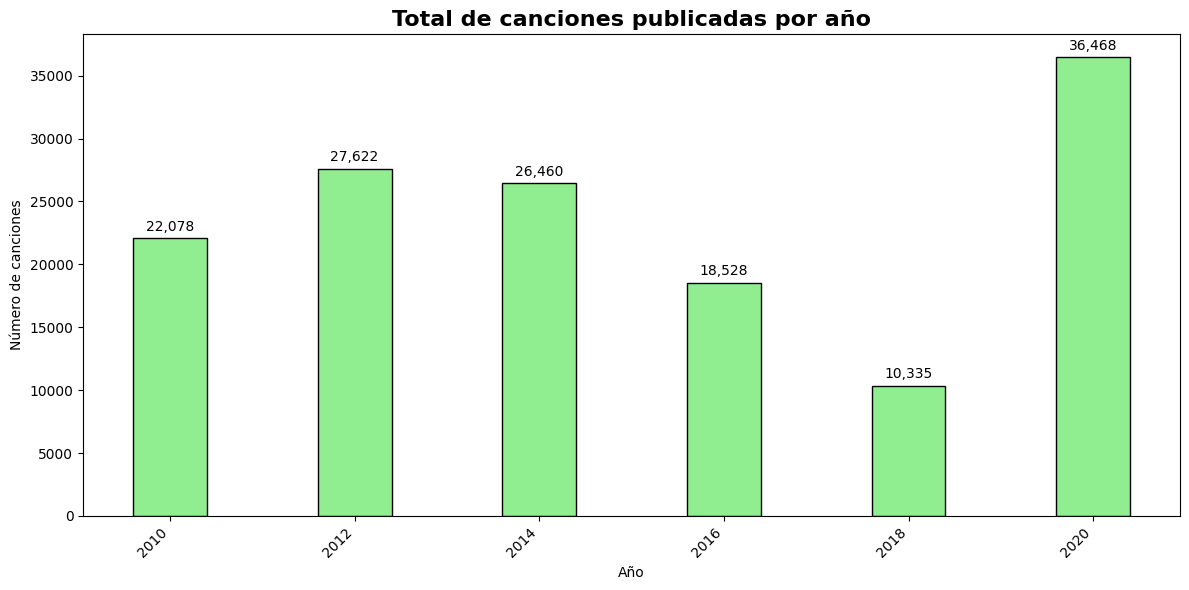

In [8]:
# ------------------------------------------------------------
# # GRÁFICO: evolución de canciones publicadas por año
# ------------------------------------------------------------
años = df_años_canciones['año']             # Lista de años
total_canciones = df_años_canciones['total_canciones']  # Número de canciones publicadas cada año

# ------------------------------------------------------------
# Crear la figura del gráfico
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
# plt.figure() crea un "lienzo" donde se dibuja el gráfico
# figsize=(12,6) significa 12 pulgadas de ancho y 6 pulgadas de alto
# Cambia estos números para hacer el gráfico más grande o más pequeño

# ------------------------------------------------------------
# Gráfico de barras
# ------------------------------------------------------------
bars = plt.bar(años, total_canciones, color='lightgreen', edgecolor='black')
# plt.bar(x, y) dibuja barras verticales
# x: años (eje X)
# y: total de canciones (eje Y)
# color: color de las barras
# edgecolor: color del borde de las barras

# ------------------------------------------------------------
# Título y etiquetas de los ejes
# ------------------------------------------------------------
plt.title("Total de canciones publicadas por año", fontsize=16, fontweight='bold')
# Título del gráfico
plt.xlabel("Año")                  # Nombre del eje X
plt.ylabel("Número de canciones")  # Nombre del eje Y

# ------------------------------------------------------------
# Rotar etiquetas del eje X
# ------------------------------------------------------------
plt.xticks(rotation=45, ha='right')
# rotation=45 rota las etiquetas 45° para que no se amontonen
# ha='right' alinea las etiquetas a la derecha

# ------------------------------------------------------------
# Mostrar valores encima de cada barra
# ------------------------------------------------------------
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,        # Posición horizontal: centro de la barra
        bar.get_height() + 0.01*max(total_canciones),  # Posición vertical: un poquito arriba de la barra
        f'{int(bar.get_height()):,}',           # Texto: valor de la barra con comas
        ha='center', va='bottom'                # Alineación del texto
    )

# ------------------------------------------------------------
# Ajuste automático de márgenes
# ------------------------------------------------------------
plt.tight_layout()  # Ajusta automáticamente los márgenes para que no se corten etiquetas ni títulos

# ------------------------------------------------------------
# Mostrar el gráfico
# ------------------------------------------------------------
plt.show()


In [9]:
# ------------------------------- 
# 🎯 CONSULTA 3: Total de álbumes por año
# -------------------------------

# 1️⃣ Creamos un cursor
# dictionary=True hace que cada fila sea un diccionario {'año': ..., 'total_albumes': ...}
mycursor = cnx.cursor(dictionary=True)

# 2️⃣ Consulta SQL: contar álbumes distintos por año
query3 = """
SELECT Anio AS año,
       COUNT(DISTINCT Album) AS total_albumes
FROM canciones
GROUP BY Anio
ORDER BY Anio ASC;
"""
mycursor.execute(query3)  # enviamos la consulta a la base de datos

# 3️⃣ Traemos los resultados
# fetchall() obtiene todas las filas; con dictionary=True cada fila viene como diccionario
resultados = mycursor.fetchall()

# 4️⃣ Convertimos a DataFrame para análisis y gráficos
df_albumes_por_año = pd.DataFrame(resultados)

# 6️⃣ Mostramos resultados
print("🎯 Total de álbumes por año")
display(df_albumes_por_año)

# 7️⃣ Cerramos cursor
mycursor.close()

🎯 Total de álbumes por año


,año,total_albumes
0,2010,893
1,2012,1100
2,2014,1232
3,2016,1133
4,2018,1458
5,2020,2032


True

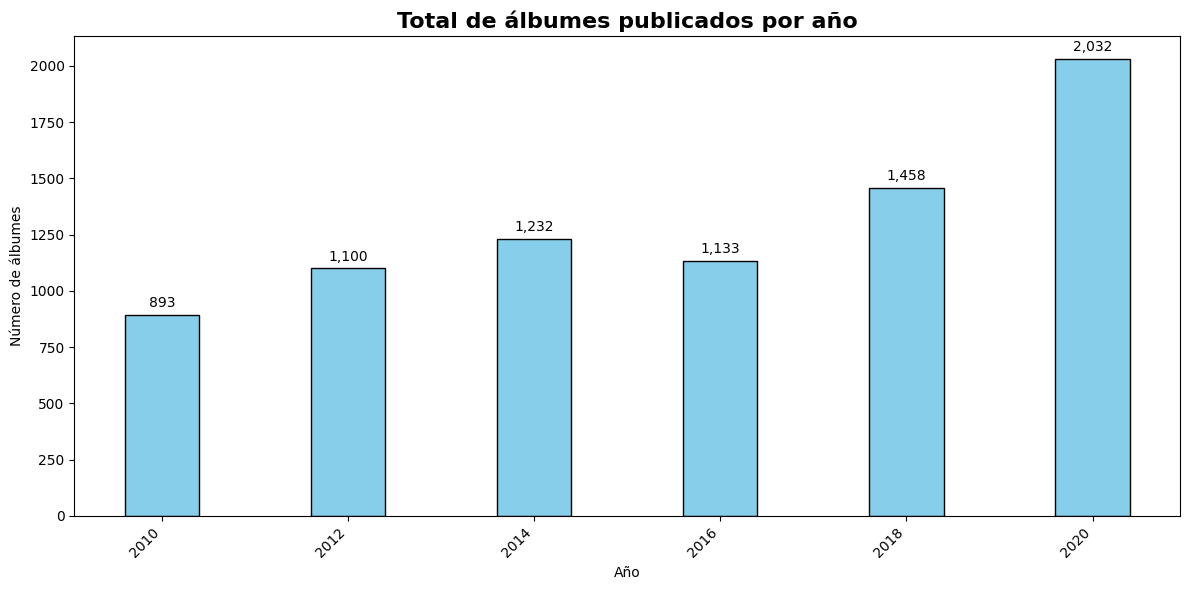

In [10]:
# ------------------------------------------------------------
# GRÁFICO: Total de álbumes por año
# ------------------------------------------------------------

# ------------------------------------------------------------
# Datos para el gráfico
# ------------------------------------------------------------
años = df_albumes_por_año['año']           # Lista de años
total_albumes = df_albumes_por_año['total_albumes']  # Número de álbumes publicados cada año

# ------------------------------------------------------------
# Crear la figura del gráfico
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
# plt.figure() crea un "lienzo" donde se dibuja el gráfico
# figsize=(12,6) indica 12 pulgadas de ancho y 6 pulgadas de alto
# Cambia estos números si quieres un gráfico más grande o más pequeño

# ------------------------------------------------------------
# Gráfico de barras
# ------------------------------------------------------------
bars = plt.bar(años, total_albumes, color='skyblue', edgecolor='black')
# plt.bar(x, y) dibuja barras verticales
# x: años (eje X)
# y: total de álbumes (eje Y)
# color: color de relleno de las barras
# edgecolor: color del borde de las barras

# ------------------------------------------------------------
# Título y etiquetas de los ejes
# ------------------------------------------------------------
plt.title("Total de álbumes publicados por año", fontsize=16, fontweight='bold')
# Título del gráfico
plt.xlabel("Año")                  # Nombre del eje X
plt.ylabel("Número de álbumes")    # Nombre del eje Y

# ------------------------------------------------------------
# Rotar etiquetas del eje X
# ------------------------------------------------------------
plt.xticks(rotation=45, ha='right')
# rotation=45: rota las etiquetas 45° para que no se monten
# ha='right': alinea las etiquetas a la derecha

# ------------------------------------------------------------
# Mostrar valores encima de cada barra
# ------------------------------------------------------------
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,        # Posición horizontal: centro de la barra
        bar.get_height() + 0.01*max(total_albumes),  # Posición vertical: un poquito arriba de la barra
        f'{int(bar.get_height()):,}',           # Texto: valor de la barra con separador de miles
        ha='center', va='bottom'                # Alineación del texto
    )

# ------------------------------------------------------------
# Ajuste de márgenes y mostrar gráfico
# ------------------------------------------------------------
plt.tight_layout()  # Ajusta automáticamente márgenes para que no se corten etiquetas
plt.show()          # Muestra el gráfico en pantalla


In [11]:
# -------------------------------
# 🎯 CONSULTA 4: Evolución de géneros por año
# -------------------------------

# 1️⃣ Creamos un cursor
# dictionary=True hace que cada fila sea un diccionario con nombres de columna
mycursor = cnx.cursor(dictionary=True)

# 2️⃣ Consulta SQL: contar canciones por género y año
query4 = """
SELECT Anio AS año,
       Genero AS genero,
       COUNT(*) AS total_canciones
FROM Canciones
GROUP BY Anio, Genero
ORDER BY año, total_canciones DESC;
"""
mycursor.execute(query4)

# 3️⃣ Traemos los resultados
# fetchall() devuelve todas las filas; cada fila es un diccionario con keys: 'año', 'genero', 'total_canciones'
resultados = mycursor.fetchall()

# 4️⃣ Convertimos a DataFrame para análisis y gráficos
df_generos_año = pd.DataFrame(resultados)

print("🎯 Evolución de géneros por año (canciones por género)")
display(df_generos_año)

# 6️⃣ Cerramos cursor
mycursor.close()

🎯 Evolución de géneros por año (canciones por género)


,año,genero,total_canciones
0,2010,rock,8824
1,2010,jazz,5616
2,2010,country,4582
3,2010,latin,3056
4,2012,jazz,9232
5,2012,rock,8048
6,2012,country,5564
7,2012,latin,4778
8,2014,jazz,10040
9,2014,rock,7650


True

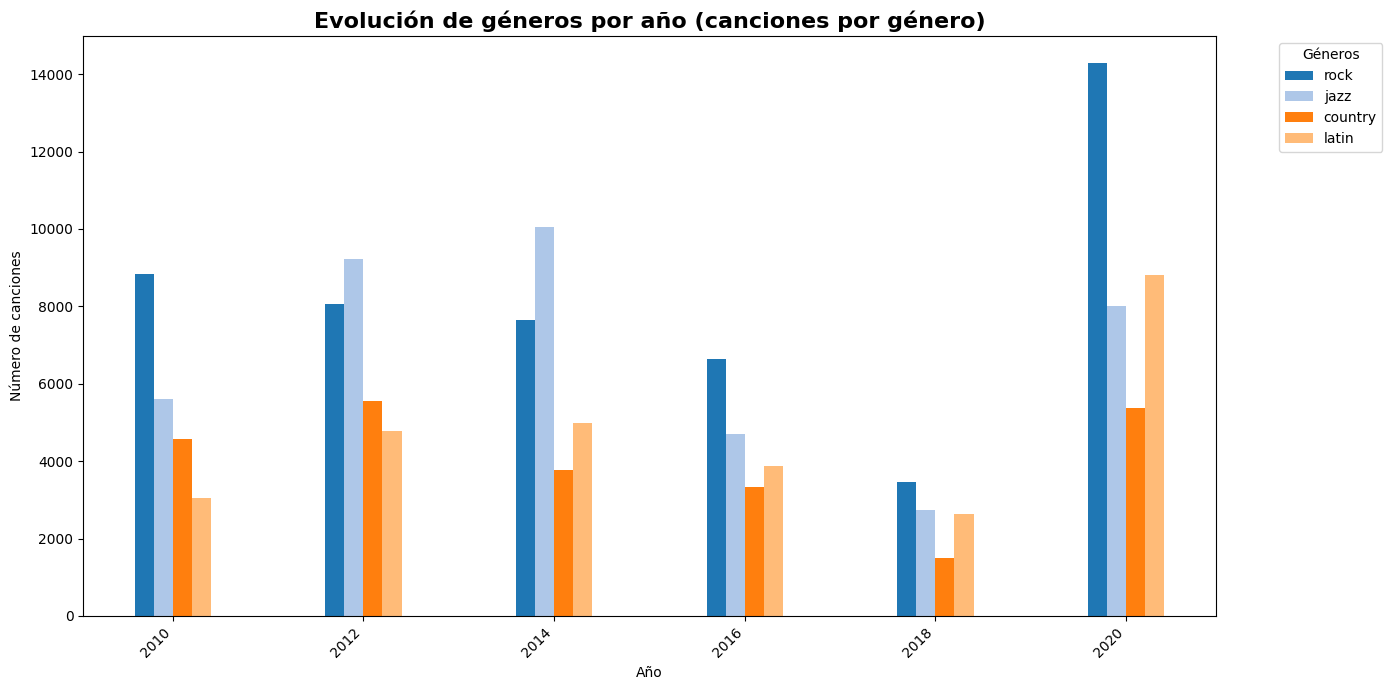

In [12]:
# ------------------------------------------------------------
# GRÁFICO: evolución de géneros por año
# ------------------------------------------------------------

# Crear figura
plt.figure(figsize=(14,7))

# Obtener los años y géneros únicos
años = sorted(df_generos_año['año'].unique())
generos = df_generos_año['genero'].unique()

# Asignar un color automático a cada género (matplotlib hace la asignación)
colors = plt.cm.tab20.colors  # paleta con 20 colores

# Dibujar barras
for i, genero in enumerate(generos):
    valores = []
    for año in años:
        fila = df_generos_año[(df_generos_año['año']==año) & (df_generos_año['genero']==genero)]
        valores.append(int(fila['total_canciones'].values[0]) if not fila.empty else 0)
    # matplotlib asigna automáticamente posiciones si sumamos un pequeño desplazamiento
    plt.bar([x + i*0.1 for x in range(len(años))], valores, width=0.1, color=colors[i % 20], label=genero)

# Título y etiquetas
plt.title("Evolución de géneros por año (canciones por género)", fontsize=16, fontweight='bold')
plt.xlabel("Año")
plt.ylabel("Número de canciones")

# Ajustar ticks del eje X
plt.xticks([x + 0.1*(len(generos)-1)/2 for x in range(len(años))], años, rotation=45, ha='right')

# Leyenda
plt.legend(title="Géneros", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
# ------------------------------- 
# 🎯 CONSULTA 5: Artistas emergentes y crecimiento de oyentes
# -------------------------------

# 1️⃣ Crear cursor con dictionary=True para acceder a columnas por nombre
mycursor = cnx.cursor(dictionary=True)

# 2️⃣ Consulta SQL: obtener artistas emergentes con sus primeros años, oyentes y productividad
query5 = """
SELECT a.Nombre_Artista,
       MIN(c.Anio) AS primer_año,
       a.Listeners AS oyentes_actuales,
       COUNT(DISTINCT c.Album) AS total_albumes,
       COUNT(c.Titulo) AS total_canciones
FROM Artistas a
JOIN Canciones c 
  ON a.Nombre_Artista = c.Artista_Relacion
GROUP BY a.Nombre_Artista, a.Listeners
ORDER BY primer_año ASC, oyentes_actuales DESC
LIMIT 10;
"""
mycursor.execute(query5)

# 3️⃣ Traer resultados y convertir a DataFrame
resultados = mycursor.fetchall()
df_artistas_emergentes = pd.DataFrame(resultados)

# 4️⃣ Mostrar resultados
print("🎯 Top 10 artistas emergentes según primer año y audiencia")
display(df_artistas_emergentes)

# 5️⃣ Cerrar cursor
mycursor.close()


🎯 Top 10 artistas emergentes según primer año y audiencia


,Nombre_Artista,primer_año,oyentes_actuales,total_albumes,total_canciones
0,Radiohead,2010,8048259,9,44
1,Nirvana,2010,7373477,90,1430
2,Queen,2010,7085762,290,4862
3,Arctic Monkeys,2010,6924955,8,100
4,The Killers,2010,6796750,124,1103
5,Linkin Park,2010,6768133,22,575
6,Maroon 5,2010,6474404,24,285
7,Green Day,2010,6437276,91,1134
8,The Beatles,2010,6372317,218,4842
9,Muse,2010,6250988,284,3985


True

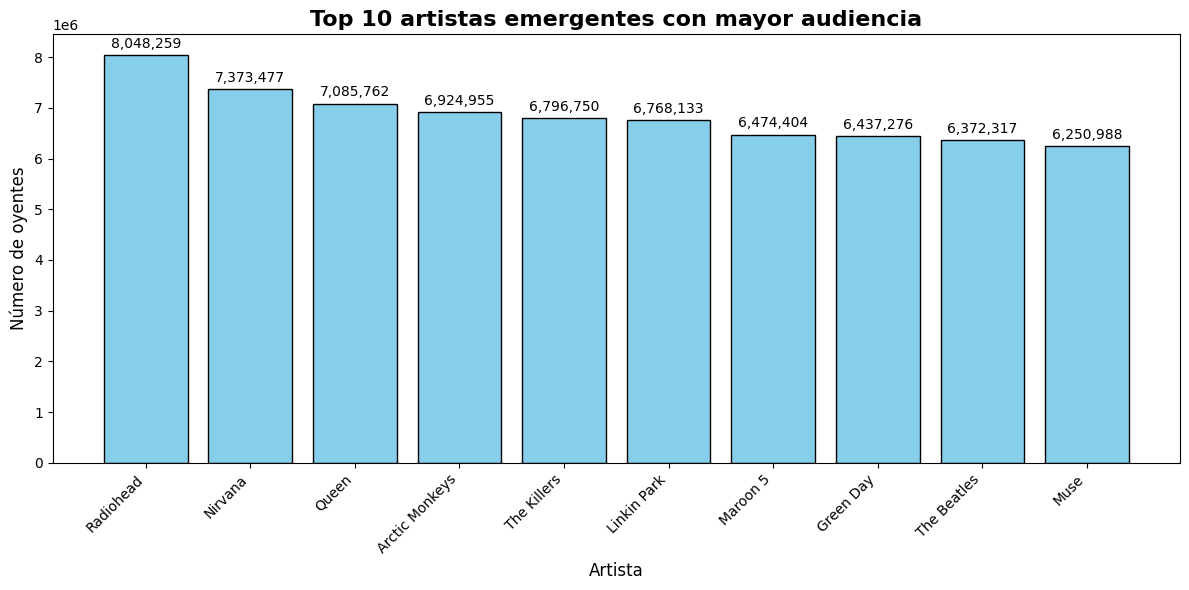

In [14]:
# -------------------------------
# GRÁFICO: Top 10 artistas emergentes
# -------------------------------

# 1️⃣ Extraer datos para el gráfico
# - eje X: nombres de los artistas
# - eje Y: número de oyentes
artistas = df_artistas_emergentes['Nombre_Artista']
oyentes = df_artistas_emergentes['oyentes_actuales']

# 2️⃣ Crear figura
# figsize=(12,6) para que las barras y etiquetas sean legibles
plt.figure(figsize=(12,6))

# 3️⃣ Crear gráfico de barras
# - color y edgecolor para diferenciar visualmente cada barra
bars = plt.bar(artistas, oyentes, color='skyblue', edgecolor='black')

# 4️⃣ Título y etiquetas de ejes
plt.title("Top 10 artistas emergentes con mayor audiencia", fontsize=16, fontweight='bold')
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Número de oyentes", fontsize=12)

# 5️⃣ Rotar etiquetas del eje X para legibilidad
plt.xticks(rotation=45, ha='right')

# 6️⃣ Mostrar valores sobre cada barra
# - Facilita leer rápidamente los datos sin mirar el eje Y
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # centro de la barra
        altura + 0.01*max(oyentes),      # un poquito arriba de la barra
        f'{int(altura):,}',              # formato con separador de miles
        ha='center', va='bottom', fontsize=10
    )

# 7️⃣ Ajuste de layout
# - Evita que etiquetas o título se corten
plt.tight_layout()

# 8️⃣ Mostrar gráfico
plt.show()
